In [1]:
# Indiana University Applied Machine Learning, Spring 2017
# Laura Kahn Programming Assignment 1
# March 21, 2017
# Code to compare the performance of Logistic Regression, Naive Bayes, Decision Tree and Nearest Neighbor on
# 1996 adult income from Census data- want to predict whether a person makes more than $50,000 a year in income based on
# one or more features.

# Python 3.5.1 Code adapted from https://jasdumas.github.io/2016-05-04-RF-in-python/ 

#import libraries: dataframe manipulation, machine learning, os tools
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import os
import csv
import matplotlib.pylab as plt
import scipy.stats as stats
import sklearn

#Import machine learning classifiers 
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NearestNeighbors

#Import ML metrics
from sklearn.cross_validation import train_test_split
import sklearn.metrics
from sklearn.metrics import classification_report
from sklearn import datasets

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Change working directory to be the same as where the data set is located
os.chdir("C:/Users/lkahn/Documents/526-AppliedMachineLearning")

In [3]:
#Load the data
import pandas as pd
df = pd.read_csv("adult.csv")
#Delete rows with no values or ? in the cell
df_clean = df.dropna() 

In [26]:
#Get summary statistics for the first five rows
df_clean.head(n=5)

,Age,Workclass,FnlWgt,Education,Education1,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours per week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [34]:
#data types for each feature/variable
df.dtypes 

Age                int64
FnlWgt             int64
Education         object
Education1         int64
Marital-status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital-gain       int64
Capital-loss       int64
Hours per week     int64
Native-country    object
Income            object
dtype: object

In [35]:
#Get summary statistics including mean, standard deviation, quartiles
df_clean.describe()

,Age,FnlWgt,Education1,Capital-gain,Capital-loss,Hours per week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,189778.366512,10.080679,1077.648844,87.303830,40.437456
std,13.640433,105549.977697,2.572720,7385.292085,402.960219,12.347429
min,17.000000,12285.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,117827.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,178356.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,237051.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,1484705.000000,16.000000,99999.000000,4356.000000,99.000000


In [36]:
#Summarize the data
import statsmodels.api as sm
df_clean.std()

Age                   13.640433
FnlWgt            105549.977697
Education1             2.572720
Capital-gain        7385.292085
Capital-loss         402.960219
Hours per week        12.347429
dtype: float64

In [37]:
#Data Exploration
#Note we are using prior knowledge that Education affects income in making this our target feature of the classifier
#Other features such as age, sex, etc could be used
df_clean.groupby('Education1').mean()

,Age,FnlWgt,Capital-gain,Capital-loss,Hours per week
Education1,,,,,
1,42.764706,235889.372549,898.392157,66.490196,36.647059
2,46.142857,239303.000000,125.875000,48.327381,38.255952
3,42.885886,232448.333333,176.021021,68.252252,38.897898
4,48.445820,188079.171827,233.939628,65.668731,39.366873
5,41.060311,202485.066148,342.089494,28.998054,38.044747
6,37.429796,196832.465166,404.574491,56.845659,37.052519
7,32.355745,194928.077447,215.097872,50.079149,33.925957
8,32.000000,199097.508083,284.087760,32.337182,35.780600
9,38.974479,189538.739739,576.800114,70.466622,40.575374


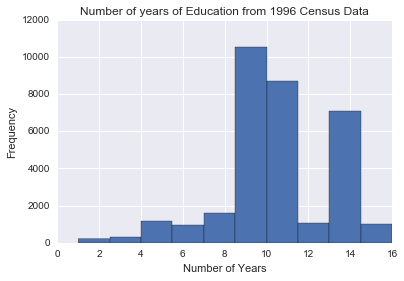

In [38]:
#Data Exploration using matplotlib
%matplotlib inline
#histogram of Education-num
df_clean.Education1.hist()
plt.title('Number of years of Education from 1996 Census Data')
plt.xlabel('Number of Years')
plt.ylabel('Frequency')

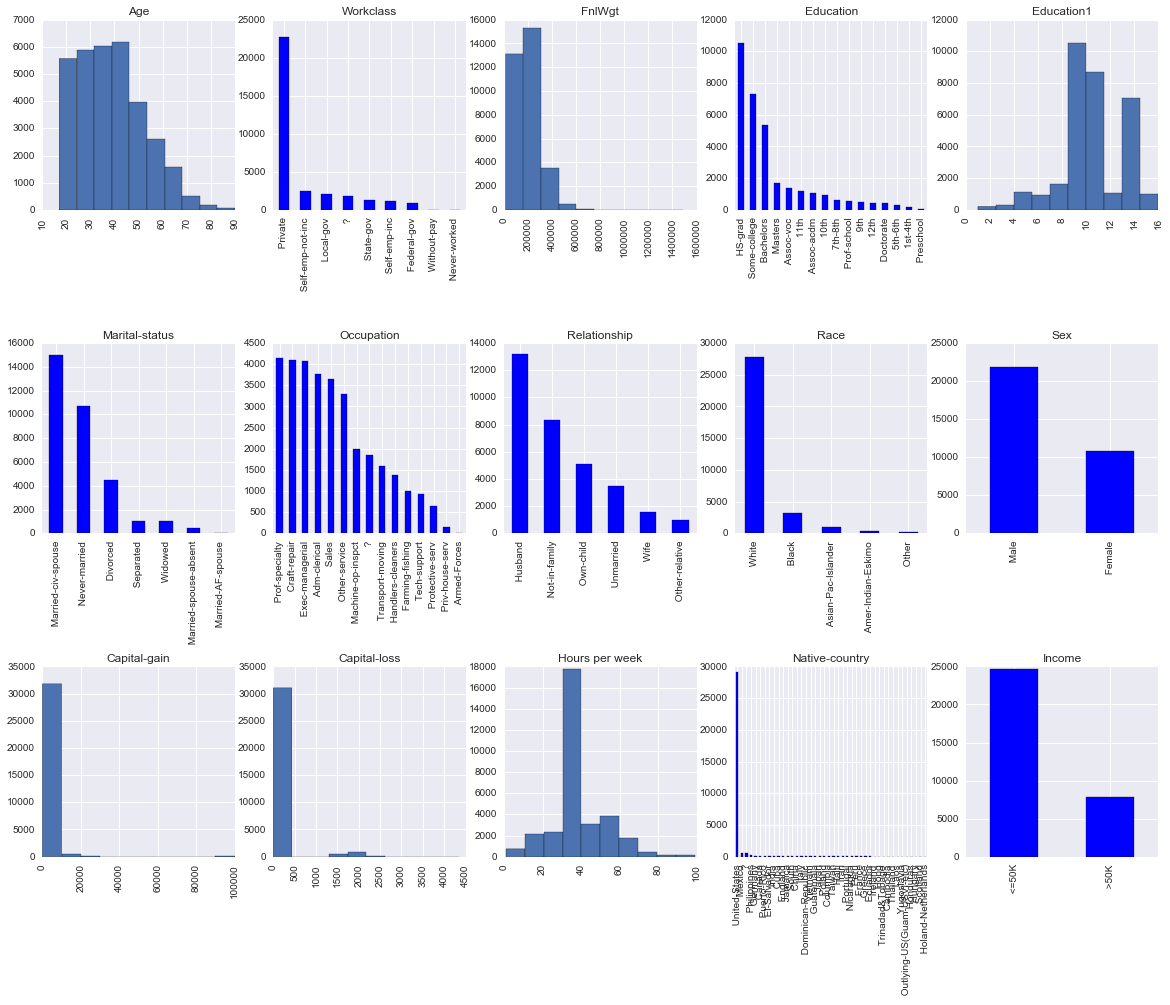

In [39]:
#Code adapted from https://www.valentinmihov.com/2015/04/17/adult-income-data-set/
#Plot distribution of each feature
fig = plt.figure(figsize=(20,15))
cols = 5
rows = (float(df_clean.shape[1]) / cols)
#Make a bar chart for each feature/column title
for i, column in enumerate(df_clean.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if df_clean.dtypes[column] == np.object:
        df_clean[column].value_counts().plot(kind="bar", axes=ax)
    else:
        df_clean[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

In [40]:
#To debug, let's print the line of code giving us the TypeError
df_clean[column][:5]

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: Income, dtype: object

In [42]:
(df["Native-country"].value_counts() / df.shape[0]).head()

 United-States    0.895857
 Mexico           0.019748
 ?                0.017905
 Philippines      0.006081
 Germany          0.004207
Name: Native-country, dtype: float64

In [ ]:
#From this exploration, we see that 89.6% of the data comes from the US

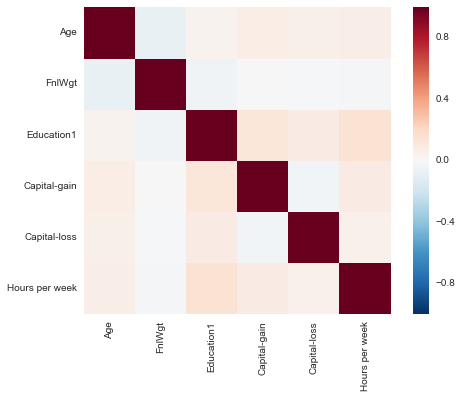

In [5]:
# Encode the categorical features as numbers
#Let's explore the correlation between the different features in the columns.
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

# Calculate the correlation and plot it as a heatmap
encoded_data, _ = number_encode_features(df_clean)
sns.heatmap(df.corr(), square=True)
plt.show()

In [4]:
#We need to preprocess the data to get rid of ? or non-numerical values
import pandas as pd
df_clean_no_missing = df.dropna()
df_clean_no_missing

,Age,Workclass,FnlWgt,Education,Education1,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours per week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [6]:
import sklearn.cross_validation as cross_validation
import sklearn.metrics as metrics
import sklearn.linear_model as linear_model

#Define y_train and y_test variables
X_train, X_test, y_train, y_test = cross_validation.train_test_split(encoded_data[encoded_data.columns - ["Income"]], 
    encoded_data["Income"], train_size=0.80)

#Let's scale the features with mean of 0 and variance of 1 using a Standard Scaler from scikit-learn
scaler = preprocessing.StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train.astype("float64")), columns=X_train.columns)
X_test = scaler.transform(X_test.astype("float64"))

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


In [40]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
print(regr.coef_)

[ 0.06430676  0.06800219  0.04604651 -0.01507692  0.12290287  0.00500516
  0.04422633 -0.0364568   0.00119176  0.00919101  0.01165943 -0.02403996
  0.05003048 -0.00552011]


In [39]:
#Now let's look at the mean square error of the linear regression model
np.mean((regr.predict(X_test)- y_test)**2)

0.17411331183786274

In [50]:
#Since a linear regression isn't the right approach since it gives too much weight to data far from the decision frontier,
#we will use Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#Fit a Logistic Regression model to the data
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
print(logistic.coef_)

[[ 0.46314164  2.37867883  0.27734993  0.05342714  0.86359904  0.03668807
   0.37042296 -0.36022573  0.0330424   0.046666    0.0856741  -0.19377297
   0.42697141 -0.03358513]]


In [51]:
#Now let's look at the mean square error of the logistic regression model
np.mean((logistic.predict(X_test)- y_test)**2)

0.17411331183786274

In [55]:
#Now let's look at accuracy of the Logistic Regression model
from sklearn.metrics import accuracy_score
print (accuracy_score(y_test, logistic.predict(X_test)))

0.825886688162


In [6]:
#Next, let's do a Multinomial Naive Bayes classifier
#We need to represent X and Y as count vectors and are going to look at how well the feature 'Education' predicts 'Income'
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df['Education'])
X.shape

(32561, 23)

In [8]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

y = df['Income']

from sklearn.cross_validation import cross_val_score
scores = cross_val_score(mnb, X, y, scoring="accuracy", cv=10)
print("Average accuracy, 10-fold cross validation:")
print(np.mean(scores))

Average accuracy, 10-fold cross validation:
0.779583173343


In [81]:
#Now let's do a Decision Tree Classifier with depth of 3 and leaf size of 5
#We're going to try to hypertune the parameters by increasing the depth size to 5
from sklearn.tree import DecisionTreeClassifier

dt3 = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=5, min_samples_leaf=5)
dt3.fit(X_train, y_train)

#Now let's look at Decision Tree accuracy
#Now let's look at the accuracy of the Decision Tree Classifier
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_test, y_test, scoring="accuracy", cv=10)
print("Average accuracy, 10-fold cross validation:")
print(np.mean(scores))

Average accuracy, 10-fold cross validation:
0.815912911417


In [83]:
#We're going to try to hypertune the parameters by increasing the depth size to 5 and decreasing cv to 5
from sklearn.tree import DecisionTreeClassifier

dt5 = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=5, min_samples_leaf=5)
dt5.fit(X_train, y_train)

#Now let's look at Decision Tree accuracy
#Now let's look at the accuracy of the Decision Tree Classifier
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_test, y_test, scoring="accuracy", cv=5)
print("Average accuracy, 5-fold cross validation:")
print(np.mean(scores))

#We can see that increasing the number of leaves has no effect, increasing the depth size has no effect on accuracy
#Decreasing the CV from 10 to 5 decreased the accuracy of the Decision Tree model

Average accuracy, 5-fold cross validation:
0.813758824164


In [84]:
#Finally, we'll do a k-Nearest Neighbor model
from sklearn.neighbors import KNeighborsClassifier
kNN3 = KNeighborsClassifier(n_neighbors=3)

kNN3.fit(X_train, y_train)

#Now let's look at the accuracy of a KNN with k = 3
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_test, y_test, scoring="accuracy", cv=10)
print("Average accuracy, 10-fold cross validation:")
print(np.mean(scores))

Average accuracy, 10-fold cross validation:
0.815912911417


In [85]:
#Let's try to hypertune the k parameter to k=10 to see if we can get better accuracy results from our kNN model

from sklearn.neighbors import KNeighborsClassifier
kNN10 = KNeighborsClassifier(n_neighbors=10)

kNN10.fit(X_train, y_train)

#Now let's look at the accuracy of a KNN with k = 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_test, y_test, scoring="accuracy", cv=10)
print("Average accuracy, 10-fold cross validation:")
print(np.mean(scores))

Average accuracy, 10-fold cross validation:
0.815912911417


In [86]:
#Let's try to hypertune the k parameter to k=20 to see if we can get better accuracy results from our kNN model

from sklearn.neighbors import KNeighborsClassifier
kNN20 = KNeighborsClassifier(n_neighbors=20)

kNN20.fit(X_train, y_train)

#Now let's look at the accuracy of a KNN with k = 20
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_test, y_test, scoring="accuracy", cv=10)
print("Average accuracy, 10-fold cross validation:")
print(np.mean(scores))

Average accuracy, 10-fold cross validation:
0.815912911417


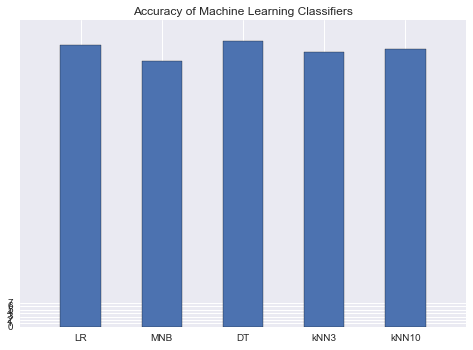

In [16]:
#Accuracy was used because it is the number of correct predictions made as a ratio of all predictions made.
#It is the most common evaluation metric for classification problems.

#Decision Tree with depth of 3 and leaf size of 5 had the highest accuracy at 83.92, then logistic regression at
#82.59%, then kNN with k=10 at 81.59 and finally multinomial Naive Bayes with accuracy of 77.96%.


#Next, we're going to plot the accuracies for each model
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

labels = ['LR', 'MNB', 'DT', 'kNN3', 
 'kNN10']
data = [82.59, 77.96, 83.92, 80.47, 81.59]

xlocations = np.array(range(len(data)))+0.5
width = 0.5
bar(xlocations, data, width=width)
yticks(range(0,8))
xticks(xlocations+ width/2, labels)
xlim(0, xlocations[-1]+width*2)
title("Accuracy of Machine Learning Classifiers")
gca().get_xaxis().tick_bottom()
gca().get_yaxis().tick_left()
show()
